In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
pip install ta yfinance

In [3]:
import pandas as pd
import numpy as np
from ta.momentum import rsi

# YFinance
import yfinance as yf

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

In [4]:
# Data local
# ruta_data = "...ruta al archivo .csv que contiene el Precio y el Spread..."
# data = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna()
# data

In [5]:
# Data desde YFinance
data = yf.download('USDJPY=X', interval = '1d', start = '2015-01-01', end = '2022-03-24')

# Renombra la columna "Close" -> "Price"
data.rename(columns={'Close' : 'Price'}, inplace = True)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Price,Adj Close,Volume
Date,,,,,,
2015-01-01,119.672997,119.672997,119.672997,119.672997,119.672997,0
2015-01-02,119.889999,120.736000,119.835999,119.870003,119.870003,0
2015-01-05,120.389000,120.608002,119.411003,120.433998,120.433998,0
2015-01-06,119.416000,119.497002,118.680000,119.425003,119.425003,0
2015-01-07,118.674004,119.639000,118.674004,118.672997,118.672997,0
...,...,...,...,...,...,...
2022-03-18,118.485001,119.389000,118.485001,118.486000,118.486000,0
2022-03-21,119.261002,119.292999,119.099998,119.263000,119.263000,0
2022-03-22,119.594002,120.975998,119.594002,119.594002,119.594002,0


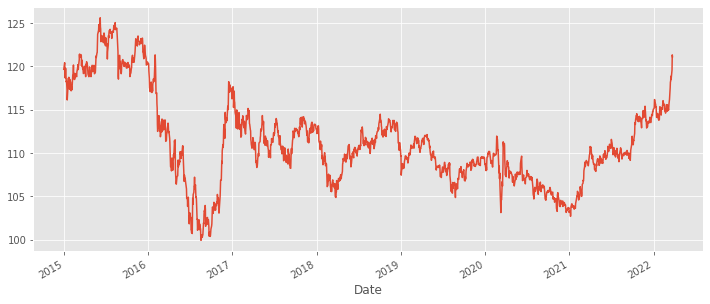

In [7]:
data['Price'].plot(figsize=(12, 5))
plt.show()

In [8]:
# Calculo del RSI (Con biblioteca TA)
data['RSI'] = rsi(data['Price'], 14, False)
data

,Open,High,Low,Price,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-01,119.672997,119.672997,119.672997,119.672997,119.672997,0,NaN
2015-01-02,119.889999,120.736000,119.835999,119.870003,119.870003,0,NaN
2015-01-05,120.389000,120.608002,119.411003,120.433998,120.433998,0,NaN
2015-01-06,119.416000,119.497002,118.680000,119.425003,119.425003,0,NaN
2015-01-07,118.674004,119.639000,118.674004,118.672997,118.672997,0,NaN
...,...,...,...,...,...,...,...
2022-03-18,118.485001,119.389000,118.485001,118.486000,118.486000,0,71.367573
2022-03-21,119.261002,119.292999,119.099998,119.263000,119.263000,0,75.046001
2022-03-22,119.594002,120.975998,119.594002,119.594002,119.594002,0,76.434888


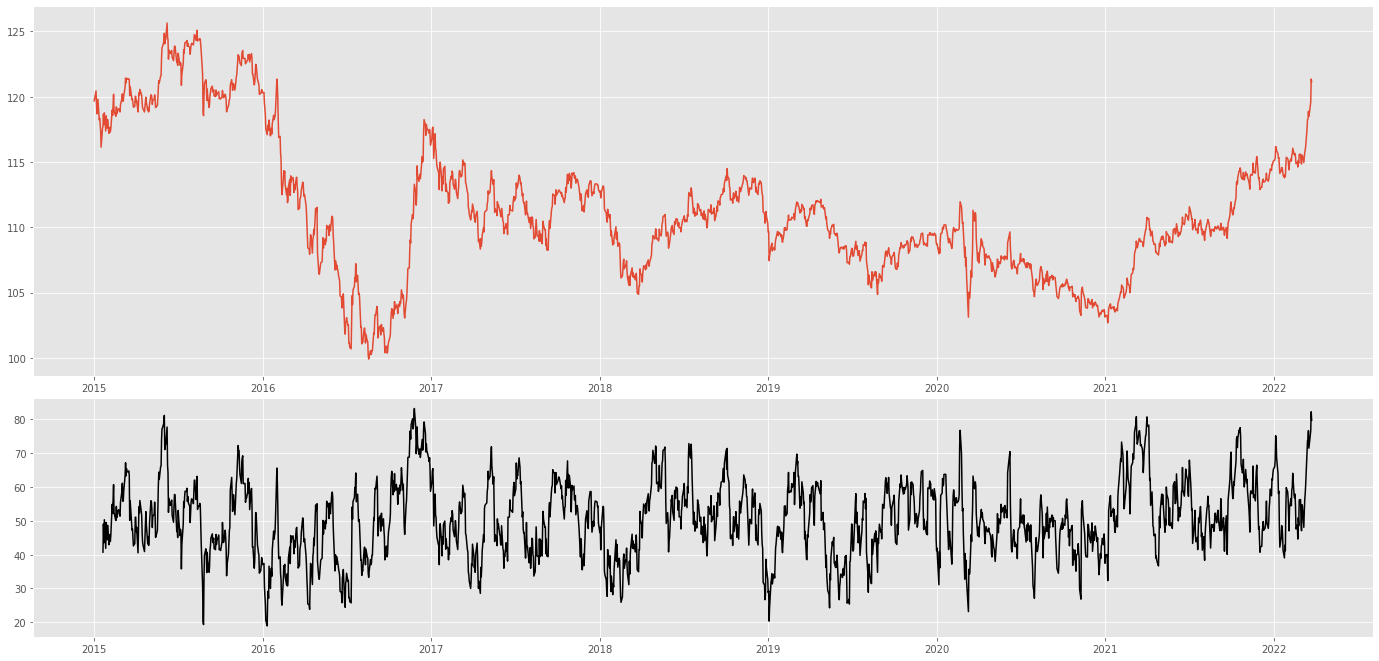

In [9]:
fig = plt.figure(figsize=(24, 14))

ax1 = plt.subplot2grid((6, 1), (1, 0), rowspan=3, colspan=1)
ax1.plot(data['Price'])

ax2 = plt.subplot2grid((6, 1), (4, 0), rowspan=3, colspan = 1, sharex = ax1)
ax2.plot(data['RSI'], color = 'black')


Agregamos las guías de referencia en el RSI

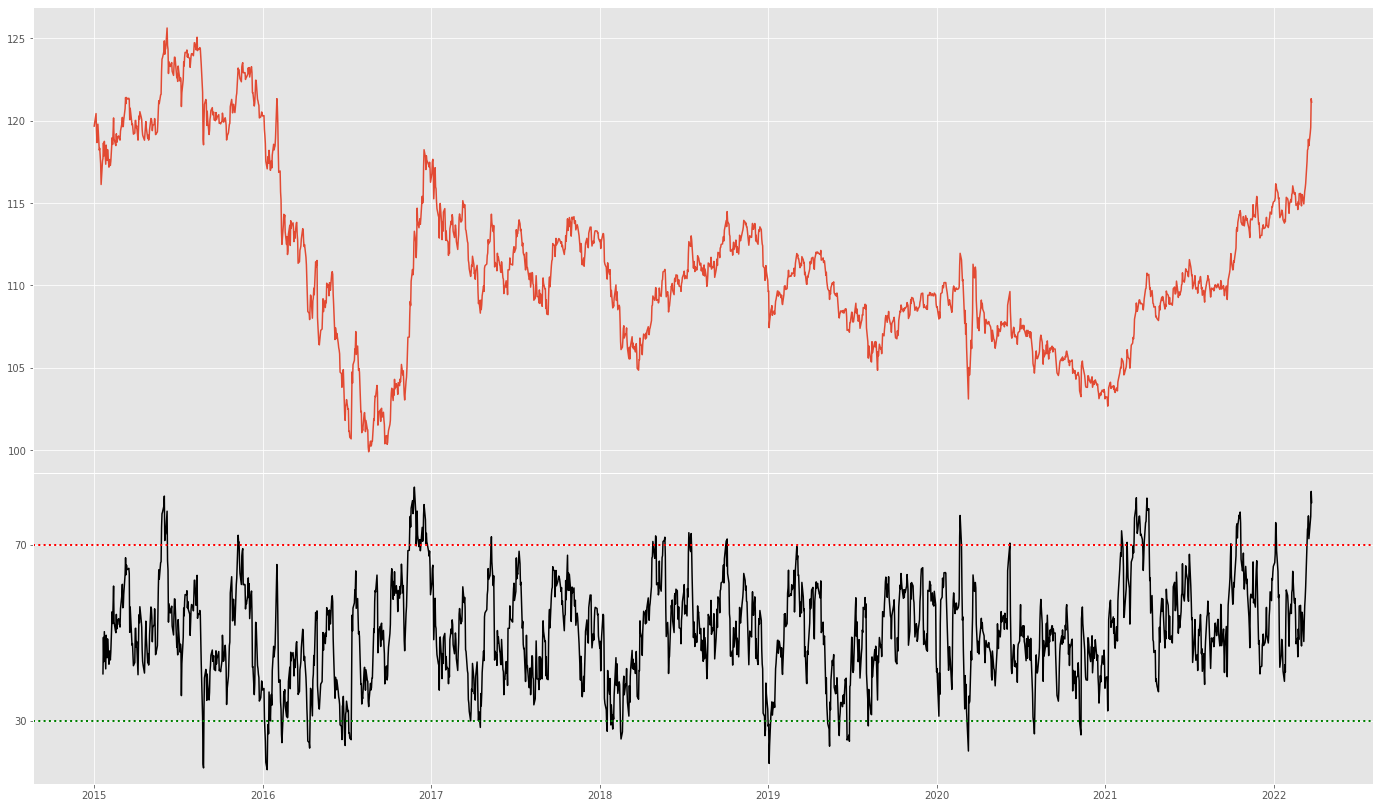

In [13]:
fig = plt.figure(figsize=(24, 14))

ax1 = plt.subplot2grid((6, 1), (1, 0), rowspan = 3, colspan = 1)
ax1.plot(data['Price'])

ax2 = plt.subplot2grid((6, 1), (4, 0), rowspan = 2, colspan = 1, sharex = ax1)
ax2.plot(data['RSI'], color='black')
ax2.axhline(70, color='red', linestyle='dotted', linewidth=2) # axhline -> axis y una linea horizontal
ax2.axhline(30, color='green', linestyle='dotted', linewidth=2) # dotted -> Lineas entre puntadas - linewidth -> Espesor
ax2.set_yticks([30, 70]) # Ver lineas guias 

plt.subplots_adjust(top = 1.05, hspace = 0) # Cerrar un poco la distancia entre el primer grafico y el segundo

## La Clase **TesterBase** *(parent)*

Usaremos la misma clase base con la que hemos estado trabajando, pero aqui modificaremos el metodo **obtener_data**, para que sea posible escoger el origen de donde estaremos extrayendo los datos financieros, ya sea **local** o **yahoo**

In [14]:
class TesterBase():
  def __init__(self, simbolo, data_origen, inicio, final, monto, usar_spread=True):
    self.simbolo = simbolo
    self.data_origen = data_origen # Implementamos el metodo 'data_origen'
    self.inicio = inicio
    self.final = final
    self.balance_inicial = monto
    self.balance_actual = monto
    self.unidades_en_activos = 0 
    self.trades = 0      
    self.posicion = 0
    self.usar_spread = usar_spread
    self.obtener_data()

  def obtener_data(self):
    if self.data_origen == "local":
      ruta_data = "...ruta al archivo .csv..."
      # raw = pd.read_csv(ruta_data, parse_dates=['Gmt time'], index_col="Gmt time").dropna() # Formatea data DUKASCOPY
      # raw = raw.loc[self.inicio : self.final]
      # self.data = raw

    if self.data_origen == "yahoo":
      raw = yf.download(self.simbolo, interval="1d", start=self.inicio, end=self.final)
      raw = raw.rename(columns = {'Close':'Precio'})

      # Comprueba si el dataframe tiene la columna 'Spread'. De lo contrario, 
      # crea una columna llamada "Spread" con valores 0
      if 'Spread' in raw.columns or 'spread' in raw.columns:
        self.data = raw
      else:
        raw['Spread'] = 0
        self.data = raw

  def obtener_valores_por_index(self, vela):
    date = str(self.data.index[vela].date())
    precio = round(self.data['Precio'].iloc[vela], 5)
    spread = round(self.data['Spread'].iloc[vela], 5)
    return date, precio, spread

  def imprimir_balance_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print("{} | Balance Inicial: {}".format(self.inicio, round(self.balance_inicial, 2)))
    print("{} | Balance Actual: {}".format(date, round(self.balance_actual, 2)))

  def comprar_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio += spread/2 # Precio ASK
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual -= unidades_en_activos * precio 
    self.unidades_en_activos += unidades_en_activos
    self.trades += 1
    print("{} | Comprando: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def vender_instrumento(self, vela, unidades_en_activos=None, monto=None):
    date, precio, spread = self.obtener_valores_por_index(vela)
    if self.usar_spread:
      precio -= spread/2 # Precio BID 
    if monto is not None: 
      unidades_en_activos = int(monto / precio) 
    self.balance_actual += unidades_en_activos * precio 
    self.unidades_en_activos -= unidades_en_activos
    self.trades += 1
    print("{} | Vendiendo: {}, {}, por: {}".format(date, unidades_en_activos, self.simbolo, precio))

  def imprimir_valor_de_posicion_actual(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    cpv = self.unidades_en_activos * precio
    print("{} | Valor de la posicion actual: {}".format(date, cpv))

  def imprimir_valor_neto_del_activo(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    net_asset_value = self.balance_actual + (self.unidades_en_activos * precio)
    print("{} | Valor Neto Actual: {}".format(date, net_asset_value))

  def cerrar_posicion(self, vela):
    date, precio, spread = self.obtener_valores_por_index(vela)
    print(100 * "-")
    print("{} | \-\-\-\-\-\ FINAL DEL BACKTEST /-/-/-/-/-/". format(date))
    self.balance_actual += self.unidades_en_activos * precio 
    self.balance_actual -= (abs(self.unidades_en_activos) * (spread / 2) * self.usar_spread)
    print("{} | Cerrando posicion de: {} | por: {}".format(date, self.unidades_en_activos, precio))
    self.unidades_en_activos = 0 
    self.trades += 1
    perf = (self.balance_actual - self.balance_inicial) / self.balance_inicial * 100 
    self.imprimir_balance_actual(vela)
    print("{} | Rendimiento Neto (%): {}".format(date, round(perf, 2)))
    print("{} | Numero de Trades: {}".format(date, self.trades))
    print(100 * "-") 

  # Performance de la Estrategia
  def Medidores_de_Riesgo(self):
    df = self.data.copy().dropna()
    riskfree_rate                  = 0.022

    # Prepara los datos que son necesarios para el uso del metodo 'Medidores_de_Riesgo'
    df['instrumento_retornos']   = df['Precio'].pct_change()
    df['estrategia_retornos'] = df['Posicion'].shift(1) * df['instrumento_retornos']
    # df.dropna(inplace=True)
    df['instrumento_retornos_acum'] = df['instrumento_retornos'].cumsum().apply(np.exp)
    df['estrategia_retornos_acum'] = df['estrategia_retornos'].cumsum().apply(np.exp)

    # Performance Absoluto ----------------------------------------------------/
    perf = df['estrategia_retornos_acum'].iloc[-1] 
    # % Superado --------------------------------------------------------------/
    pct_superado = perf - df['instrumento_retornos_acum'].iloc[-1] 
    # CAGR --------------------------------------------------------------------/
    numero_de_anios = len(df)/252 
    CAGR = (df['estrategia_retornos_acum'][-1])**(1/numero_de_anios) -1 
    # Volatilidad Anual -------------------------------------------------------/
    vol = df['instrumento_retornos'].std()* np.sqrt(252) 
    # Sharpe Ratio ------------------------------------------------------------/
    sharpe_ratio = (CAGR - riskfree_rate) / vol
    # Sortino Ratio -----------------------------------------------------------/
    neg_vol = df[df['instrumento_retornos'] < 0]['instrumento_retornos'].std()* np.sqrt(252) 
    sortino_ratio = (CAGR - riskfree_rate) / neg_vol
    # MDD ---------------------------------------------------------------------/
    df['max_ret_acum'] = df['estrategia_retornos_acum'].cummax()
    df['drawdown']     = df['max_ret_acum'] - df['estrategia_retornos_acum']
    df['drawdown_pct'] = df['drawdown'] / df['max_ret_acum']
    mdd                = df['drawdown_pct'].max()
    # Calmar Ratio ------------------------------------------------------------/
    calmar = CAGR / mdd
    # Imprime los valores con su respectivo texto -----------------------------/
    print("RENDIMIENTO DE LA ESTRATEGIA")
    print("-" * 100)
    print("% Superado al Benchmark:__" + str(round((pct_superado*100), 2)) + "%")
    print("CAGR (Rendimiento Anual)__" + str(round((CAGR*100), 2)) + "%")
    print("Volatilidad Anual:________" + str(round((vol*100), 2)) + "%")
    print("Maximum Drawdown:_________" + str(round((mdd*100), 2)) + "%")
    print("Sharpe R._________________" + str(round(sharpe_ratio, 2)))
    print("Sortino R.________________" + str(round(sortino_ratio, 2)))
    print("Calmar R._________________" + str(round(calmar, 2)))
    print("-" * 100)

  def plotear_data(self, cols=None):
    if cols is None:
      cols = "Precio"
    self.data[cols].plot(figsize=(12,6), title=self.simbolo)

## BacktesterIterativo *(child)*

In [15]:
class BacktesterIterativo(TesterBase):
  
  # Metodo ayuda Comprar
  def ir_long(self, vela, unidades_en_activos=None, monto=None):
    if self.posicion == -1: 
      self.comprar_instrumento(vela, unidades_en_activos= -self.unidades_en_activos) 
    if unidades_en_activos:
      self.comprar_instrumento(vela, unidades_en_activos= unidades_en_activos)
    elif monto:
      if monto == 'todo':
        monto = self.balance_actual
      self.comprar_instrumento(vela, monto=monto) # Ir Long

  # Metodo ayuda Vender
  def ir_short(self, vela, unidades_en_activos=None, monto=None):
    if self.posicion == 1: 
      self.vender_instrumento(vela, unidades_en_activos= self.unidades_en_activos)
    if unidades_en_activos:
      self.vender_instrumento(vela, unidades_en_activos = unidades_en_activos)
    elif monto:
      if monto == 'todo':
        monto = self.balance_actual
      self.vender_instrumento(vela, monto=monto) # Ir Short


  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  # ESTRATEGIA CRUCE SMA -------------------------------------------------------------------------------------+
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def Estrategia_Cruce_SMAs(self, sma_rapida, sma_lenta, plot_graph=True):

    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Cruce de SMAs | {} | sma_rapida: {} | sma_lenta: {}".format(self.simbolo, sma_rapida, sma_lenta)
    print("-" * 100)
    print(stm)
    print("-" * 100)

    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data

    # Preparar datos (calcula las SMAs)
    from ta.trend import SMAIndicator

    # Al principio nombramos la nueva columna según el valor que se coloca en los parámetros SMAs
    self.data["SMA_R: "+str(sma_rapida)] = SMAIndicator(self.data['Precio'], sma_rapida, False).sma_indicator() 
    self.data["SMA_L: "+str(sma_lenta)]  = SMAIndicator(self.data['Precio'], sma_lenta, False).sma_indicator() 
    self.data.dropna(inplace=True)

    # Cruce de las SMAs 
    self.data['Posicion'] = 0 # Crea la columna 'Posición' (la usaremos para plotear los resultados)

    for vela in range(len(self.data)-1): # Todas las velas excepto la última vela

      # Senal para ir Long
      if self.data["SMA_R: "+str(sma_rapida)].iloc[vela] > self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.posicion in [0, -1]: # Comprueba si la posición es neutra (0) o Short (-1)
          self.ir_long(vela, monto = 'todo') # Ir Long con todo el monto disponible
          self.posicion = 1 # Posicion Long 
          
          # Popula la columna 'posiciones' en cada loop (con señales de compra (1))          
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 
      
      # Senal para ir Short
      elif self.data["SMA_R: "+str(sma_rapida)].iloc[vela] < self.data["SMA_L: "+str(sma_lenta)].iloc[vela]: 
        if self.posicion in [0, 1]: # Comprueba si la posición es neutra (0) o Long (1)
          self.ir_short(vela, monto = 'todo') # Ir Short con todo el monto disponible
          self.posicion = -1 # Posicion Short 
          
          # Popula la columna 'posiciones' en cada loop (con señales de venta (-1))
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))
      ax1 = plt.subplot2grid((2,1), (1,0), rowspan=2, colspan=1)
      ax1.plot(self.data['Precio'], label="precio", color='black')
      ax1.plot(self.data["SMA_R: "+str(sma_rapida)], label = str(sma_rapida) + " periodos SMA")
      ax1.plot(self.data["SMA_L: "+str(sma_lenta)], label = str(sma_lenta) + " periodos SMA")
      # Plotea Trades en Long
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Precio'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades en Short
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Precio'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')

      plt.title(self.simbolo +"\n Estrategia Cruce SMAs "+str(sma_rapida)+ " - " +str(sma_lenta), fontsize = 20)
      plt.legend(fontsize = 15)
      plt.show()

  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  # ESTRATEGIA CRUCE RSI -------------------------------------------------------------------------------------+
  # +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def Estrategia_Cruce_RSI(self, sobrecomprado=70, sobrevendido=30, plot_graph=True):
    
    # Imprime datos de la estrategia
    stm = "TESTANDO LA ESTRATEGIA: Cruce de RSI | {} | sobrecomprado: {} | sobrevendido: {}".format(self.simbolo, sobrecomprado, sobrevendido)
    print("-" * 100)
    print(stm)
    print("-" * 100)

    # Resetea el backtest
    self.posicion = 0 # Posicion inicial neutral
    self.trades   = 0 # No Trades aun
    self.balance_actual = self.balance_inicial # Resetea el capital inicial
    self.obtener_data() # Resetea la data
    
    # Preparar datos (calcula el RSI)
    from ta.momentum import rsi 
    self.data['RSI'] = rsi(self.data['Precio'], 14, False)

    # Cruce RSI 
    self.data['Posicion'] = 0 # Crea la columna 'Posición' (la usaremos para plotear los resultados)

    for vela in range(len(self.data)-1): # Todas las velas excepto la última

      # Senal para ir Long
      if self.data["RSI"].iloc[vela] < sobrevendido: 
        if self.posicion in [0, -1]: # Comprueba si la posición es neutra (0) o Short (-1)
          self.ir_long(vela, monto = 'todo') # Ir Long con todo el monto disponible
          self.posicion = 1 # Posicion Long
          
          # Popula la columna 'posiciones' en cada loop (con señales de compra (1))          
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

      # Senal para ir Short
      elif self.data["RSI"].iloc[vela] > sobrecomprado:
        if self.posicion in [0, 1]: # Comprueba si la posición es neutra (0) o Long (1)
          self.ir_short(vela, monto = 'todo') # Ir Short con todo el monto disponible
          self.posicion = -1 # Posicion Short 

          # Popula la columna 'posiciones' en cada loop (con señales de venta (-1))
          self.data.at[self.data.index[vela], 'Posicion'] = self.posicion 

    if self.trades > 0:
      self.cerrar_posicion(vela+1) # Cierra la posicion en la ultima vela
    else:
      print("NO HAY TRADES EN ESTE PERIODO DE TIEMPO. Prueba con otro período")
      print(100 * "-")

    # Imprime los Medidores de Riesgo en la estrategia
    self.Medidores_de_Riesgo()

    # Plotea el grafico de la estrategia, incluido los marcadores de los trades
    if plot_graph and self.trades > 0:
      fig = plt.figure(figsize=(24,18))

      ax1 = plt.subplot2grid((9,1), (1,0), rowspan=4, colspan=1)
      ax1.plot(self.data['Precio'], color='black')      
      # Plotea Trades Long, en el Grafico del Precio
      ax1.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['Precio'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Trades Short, en el Grafico del Precio
      ax1.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['Precio'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')
      
      ax2 = plt.subplot2grid((9,1), (5,0), rowspan=2, colspan=1, sharex=ax1)
      ax2.plot(self.data['RSI'], color='orange')
      # Plotea Senales Long, en el Grafico RSI
      ax2.plot(self.data[self.data['Posicion'] == 1].index, 
              self.data['RSI'][self.data['Posicion'] == 1], '^', markersize = 15, color='green', label='Long')
      # Plotea Senales Short, en el Grafico RSI
      ax2.plot(self.data[self.data['Posicion'] == -1].index, 
              self.data['RSI'][self.data['Posicion'] == -1], 'v', markersize = 15, color='red', label='Short')
      # Plotea lineas de referencia en el Grafico RSI
      ax2.axhline(70, color='red', linestyle='dotted', linewidth=2)
      ax2.axhline(30, color='green', linestyle='dotted', linewidth=2)
      ax2.set_yticks([30,70])
      ax2.set_title("RSI", loc='left')

      fig.suptitle(self.simbolo +"\n Estrategia Cruce RSI", fontsize = 20)
      plt.subplots_adjust(top=1.05, hspace=0)
      plt.show()

In [18]:
# Obteniendo la data de origen "local"
# bkbase = BacktesterIterativo("EURUSD", "local", "2006-12-31", "2020-06-30", 100000, usar_spread=False)

# Obteniendo la data de origen "yahoo" - FOREX
# bkbase = BacktesterIterativo("EURUSD=X", "yahoo", "2020-12-31", "2021-06-30", 100000, usar_spread=False)

# Obteniendo la data de origen "yahoo" - STOCKS
bkbase = BacktesterIterativo("TSLA", "yahoo", "2015-01-01", "2020-01-01", 100000, usar_spread=False)

[*********************100%***********************]  1 of 1 completed


In [19]:
bkbase.data

,Open,High,Low,Precio,Adj Close,Volume,Spread
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,0
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,0
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,0
...,...,...,...,...,...,...,...
2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500,0
2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500,0
2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500,0


----------------------------------------------------------------------------------------------------
TESTANDO LA ESTRATEGIA: Cruce de RSI | TSLA | sobrecomprado: 70 | sobrevendido: 30
----------------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
2015-04-27 | Vendiendo: 2159, TSLA, por: 46.31
2015-10-12 | Comprando: 2159, TSLA, por: 43.116
2015-10-12 | Comprando: 2479, TSLA, por: 43.116
2016-03-15 | Vendiendo: 2479, TSLA, por: 43.668
2016-03-15 | Vendiendo: 2479, TSLA, por: 43.668
2016-05-12 | Comprando: 2479, TSLA, por: 41.456
2016-05-12 | Comprando: 2743, TSLA, por: 41.456
2016-12-23 | Vendiendo: 2743, TSLA, por: 42.668
2016-12-23 | Vendiendo: 2743, TSLA, por: 42.668
2017-11-02 | Comprando: 2743, TSLA, por: 59.852
2017-11-02 | Comprando: 1168, TSLA, por: 59.852
2018-06-12 | Vendiendo: 1168, TSLA, por: 68.554
2018-06-12 | Vendiendo: 1168, TSLA, por: 68.554
2018-09-07 | Comprando:

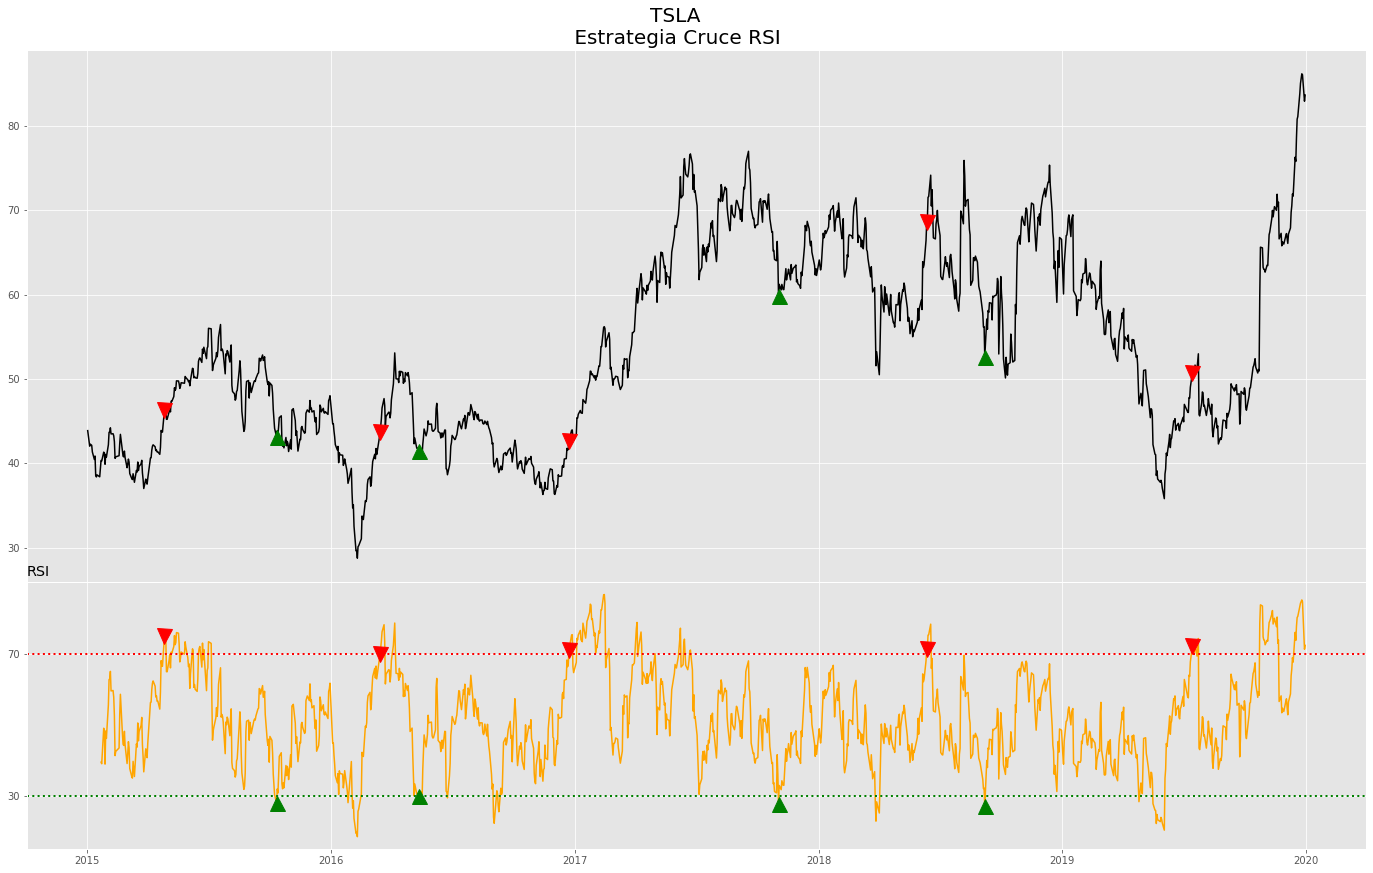

In [20]:
bkbase.Estrategia_Cruce_RSI()